 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ МЕНТОРА</u></b>
Имран, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Николай, приветствую! Благодарю за ревью проекта, далее постараюсь поправить моменты, вызывающие вопросы.
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 2</b><br>Добрый вечер, Имран! Спасибо. Ок, хорошо, пошёл смотреть)

# Финальный проект: Телекоммуникации

**Задача:** Обучение модели для прогноза оттока клиентов, т.е. бинарная классификациия. Метрика качества модели - f1_score.

**Дано:**
1. Информация об основных услугах;
2. Информация о дополнительных услугах;
3. Данные клиентов.

**План работ:**
1. Импортировать необходимые библиотеки, произвести загрузку предоставленных данных и ознакомиться с ними.
2. Произвести исследовательский анализ и предобработку данных, определить полезные признаки для решения задачи. Сформировать единый датафрейм с необходимыми признаками.
3. Анализ единого датафрейма, при необходиммости - предобработка данных и генерация дополнительных признаков. После выполнения работ сформировать выборки для обучения моделей.
4. Обучение моделей с учетом подбора гиперпараметров и выбор лучшей модели. Проверка качества модели на тестовых данных.
5. Общий вывод по проекту.

**Выбранные модели:**
- RandomForestClassifier
- CatBoostClassifier
- LGBMClassifier

Выбор моделей обусловлен стремлением к максимальной точности предсказаний, поэтому выбор пал в первую очередь на ансамблевые модели.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ок, это хороший тон - дать описание проблематики. Поэтому, можжно делать это ещё подробнее)</p>
</div>

## Импорт библиотек, загрузка и ознакомление с данными

### Импортируем библиотеки, которые могут понадобиться для работы

In [1]:
#!pip install phik

In [2]:
#!pip install shap

In [3]:
#!pip install gdown

In [4]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import ProfileReport
import os
import re
import phik
import shap
from phik.report import plot_correlation_matrix

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     cross_val_score)
from sklearn.metrics import (f1_score,
                            roc_auc_score,
                            roc_curve, auc,
                            confusion_matrix,
                            ConfusionMatrixDisplay,
                            precision_score,
                            recall_score)
from sklearn.preprocessing import (OrdinalEncoder,
                                   OneHotEncoder,
                                   StandardScaler)
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline as ImbPipeline

from tqdm import notebook
from tqdm import tqdm
import gdown


import  warnings
warnings.filterwarnings('ignore')

### Загрузим файлы с данными

In [5]:
df_links = [  
    'https://drive.google.com/uc?id=1pY8oUSxcRuspw5hvYFIhtew6cO59_els',
    'https://drive.google.com/uc?id=1RcuruUJLd0TUihhC3KuqEy9LSZapXkOy',
    'https://drive.google.com/uc?id=1E63g88KMTC6LHRSDPkl3OGcPpHzEfDq-',
    'https://drive.google.com/uc?id=1RvJDeFGaXyHzyTavFJwc2paYS4E_Tz99'
]

dfs = ['contract_new.csv', 'personal_new.csv', 'internet_new.csv', 'phone_new.csv']
dfs_names = ['contract_new', 'personal_new', 'internet_new', 'phone_new']

for i in range(len(df_links)):
    try:
        output = dfs[i]
        gdown.download(df_links[i], output, quiet=False)
        data = pd.read_csv(output)
        exec(f'{dfs_names[i]} = data')
        print(f'Данные из файла {dfs[i]} успешно загружены в переменную {dfs_names[i]}')
    except Exception as e:
        print(f'Ошибка при загрузке файла {dfs[i]}: {e}')

Downloading...
From: https://drive.google.com/uc?id=1pY8oUSxcRuspw5hvYFIhtew6cO59_els
To: /home/jovyan/work/contract_new.csv
100%|██████████| 531k/531k [00:00<00:00, 1.69MB/s]


Данные из файла contract_new.csv успешно загружены в переменную contract_new


Downloading...
From: https://drive.google.com/uc?id=1RcuruUJLd0TUihhC3KuqEy9LSZapXkOy
To: /home/jovyan/work/personal_new.csv
100%|██████████| 182k/182k [00:00<00:00, 2.05MB/s]


Данные из файла personal_new.csv успешно загружены в переменную personal_new


Downloading...
From: https://drive.google.com/uc?id=1E63g88KMTC6LHRSDPkl3OGcPpHzEfDq-
To: /home/jovyan/work/internet_new.csv
100%|██████████| 221k/221k [00:00<00:00, 1.25MB/s]


Данные из файла internet_new.csv успешно загружены в переменную internet_new


Downloading...
From: https://drive.google.com/uc?id=1RvJDeFGaXyHzyTavFJwc2paYS4E_Tz99
To: /home/jovyan/work/phone_new.csv
100%|██████████| 92.0k/92.0k [00:00<00:00, 14.8MB/s]

Данные из файла phone_new.csv успешно загружены в переменную phone_new


Данные успешно загружены, далее отдельно ознакомимся с каждым датасетом.

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>упс( не пошло..</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Хм, я делал проект во встроенной тетрадке практикума и загрузил файлы в своею практикумовскую директорию.
Заколхозил вариант с использованием гугл драйва, вроде работает.
    
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>отлично, всё заработало)</p>
</div>

### Ознакомление с данными

#### Файл contract_new (данные о договоре с привязкой к абоненту)

In [6]:
display(contract_new.info())
display(contract_new.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [7]:
print('Количество дубликатов:', contract_new.duplicated().sum())
print('Количество дубликатов в customerID:', contract_new['customerID'].duplicated().sum())


Количество дубликатов: 0
Количество дубликатов в customerID: 0


Итак, в этой таблице видим данные по договору в несколько несколько полей:

1) customerID - уникальный идентификатор абонента;\
2) BeginDate - дата начала действия договора, необходимо изменить формат на дату;\
3) EndDate - дата окончания действия договора, необходимо изменить формат на дату;\
4) Type - периодичность оплаты, каждый месяц либо год;\
5) PaperlessBilling - электронный расчётный лист, булево значение - да или нет, можно поменять формат на bool;\
6) PaymentMethod - тип платежа, категориальный признак с несколькими вариантами значений;\
7) MonthlyCharges - расходы за месяц;\
8) TotalCharges -  общие расходы абонента, необходимо поменять формат на float.

Всего в таблице 7043 строки, без пропусков и дубликатов.
Ключем для связи с другими таблицами будет выступать поле customerID.

Для объединения в итоговую таблицу можно включить поля Type, PaymentMethod, MonthlyCharges, TotalCharges и создать новое поле - срок жизни абонента в компании. Поле PaperlessBilling врядли может быть полезно для модели, т.к. использование или неиспользование электронного расчётного листа врядли может влиять на решение об уходе.

В качестве целевого признака можно использовать поле EndDate - если оно заполнено, значит абонент ушел.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>отлично по первичным выводам!!!</p>
</div>

Поменяем типы данных:

In [8]:
contract_new['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
contract_new['BeginDate'] =  pd.to_datetime(contract_new['BeginDate'], errors='coerce')
contract_new['EndDate'] =  pd.to_datetime(contract_new['EndDate'], errors='coerce')
contract_new['TotalCharges'] =  pd.to_numeric(contract_new['TotalCharges'], errors='coerce')

In [10]:
display(contract_new.info())
display(contract_new.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50


Типы изменены.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ок</p>
</div>

#### Файл personal_new (данные об абоненте)

In [11]:
display(personal_new.info())
display(personal_new.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [12]:
print('Количество дубликатов:', personal_new.duplicated().sum())
print('Количество дубликатов в customerID:', personal_new['customerID'].duplicated().sum())

Количество дубликатов: 0
Количество дубликатов в customerID: 0


В таблице personal_new имеется 5 полей и 7043 записи без пропусков и дубликатов.

Поля следующие:
1) customerID - уникальный идентификатор абонента;\
2) gender - пол, категориальный признак;\
3) SeniorCitizen - признак пенсионера, булево значение, можно поменять формат на bool;\
4) Partner - признак наличия супруга/супруги, булево значение, можно поменять формат на bool;\
5) Dependents - признак наличия детей, булево значение, можно поменять формат на bool.

Здесь все поля кажутся полезными для модели, т.к. в различных конфигурациях эти признаки представляют различные клиентские сегменты.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>хорошо, идём дальше.</p>
</div>

#### Файл internet_new (расширенные данные об интернет-услугах с привязкой к абоненту)

In [13]:
display(internet_new.info())
display(internet_new.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [14]:
print('Количество дубликатов:', internet_new.duplicated().sum())
print('Количество дубликатов в customerID:', internet_new['customerID'].duplicated().sum())

Количество дубликатов: 0
Количество дубликатов в customerID: 0


В таблице internet_new содержится 5517 строк и 8 полей, без пропусков и дубликатов:

1) customerID - уникальный идентификатор абонента;\
2) InternetService - тип подключения, категориальный признак из нескольких значений;\
3) OnlineSecurity - признак услуги блокировка опасных сайтов, булево значение;\
4) OnlineBackup - признак услуги облачное хранилище файлов для резервного копирования данных, булево значение;\
5) DeviceProtection - признак услуги антивирус, булево значение;\
6) TechSupport - признак услуги выделенная линия технической поддержки, булево значение;\
7) StreamingTV - признак услуги стриминговое телевидение, булево значение;\
8) StreamingMovies - признак услуги каталог фильмов, булево значение;

Почти все столбцы можно перевести в формат bool.

В данном случае все поля будут полезны для модели, т.к. вероятно, что проблемы с отдельными услугами приводят к уходу абонентов.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ок</p>
</div>

#### Файл phone_new (данные об услуге телефонии с привязкой к абоненту)

In [15]:
display(phone_new.info())
display(phone_new.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [16]:
print('Количество дубликатов:', phone_new.duplicated().sum())
print('Количество дубликатов в customerID:', phone_new['customerID'].duplicated().sum())

Количество дубликатов: 0
Количество дубликатов в customerID: 0


В таблице phone_new содержится 6361 строка и 2 поля, без пропусков и дубликатов.
Кроме идентификатора абонента, присутствует столбец MultipleLines - признак подключения телефона к нескольким линиям одновременно, булево значение.

### Вывод по этапу 1

Провели загрузку и первичное ознакомление с данными, можно подвести следующий итог:
1. Данные неплохого качества - нет дубликатов и пропусков.
2. Всего клиентов - 7043, при этом: пользователей интернета 5517, пользователей телефона - 6361. Т.е., скорее всего, большая часть клиентов пользуется одновременно обеими услугами, а также есть небольшая часть клиентов, которая пользуется той, или иной услугой. Возможно, следует вывести отдельные признаки по наличию услуг.
3. Были изменены типы данных в столбцах соответственно их содержимому.

В следующем разделе взглянем на данные более пристально.
Изменение формата столбцов также предпочитаю оставить на следующий этап, при более подробном ознакомлении с данными.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Всё сделано, как надо - и аналитика , и выводы. Осталось только с шрафическим анализом  поработать)</p>
</div>

In [17]:
# Приведем наименования столбцов в нужный формат.
dataframes = [contract_new, personal_new, internet_new, phone_new]

def to_snake_case(column_name):
    column_name = re.sub(r'([a-z])([A-Z])', r'\1_\2', column_name).lower()
    column_name = column_name.lower()
    return column_name

for d in dataframes:
    d.columns = [to_snake_case(col) for col in d.columns]

for d in dataframes:
    print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 no

## Исследовательский анализ и предобработка данных

Для исследования я буду использовать инструмент ProfileReport из ydata_profiling.

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Здорово, что автоматический отчёт тоже освоил. Но всё же дипломная работа) Поэтому, тут надо показать всё на что способен своими командами и функциями, без автоотчёта) Хорошо было бы, если б исправил..</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Ок, скорректировал
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 2</b><br>👍

### Исследуем таблицу contract_new

In [18]:
 contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


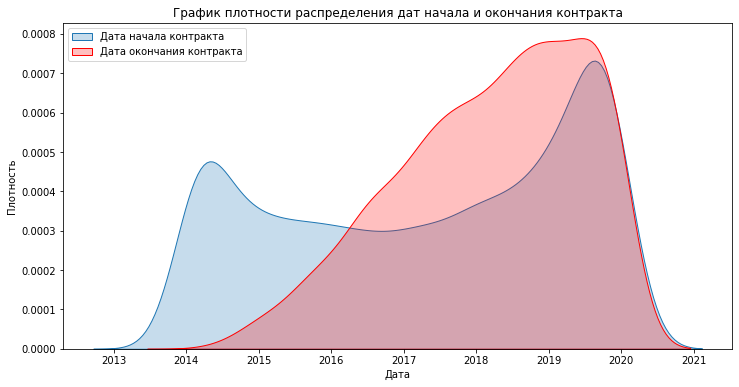

In [19]:
plt.figure(figsize=(12, 6))
sns.kdeplot(contract_new['begin_date'], fill = True, label = 'Дата начала контракта')
sns.kdeplot(contract_new['end_date'], fill = True, label = 'Дата окончания контракта', color = 'red')

plt.title('График плотности распределения дат начала и окончания контракта')
plt.xlabel('Дата')
plt.ylabel('Плотность')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, 1))
plt.show()

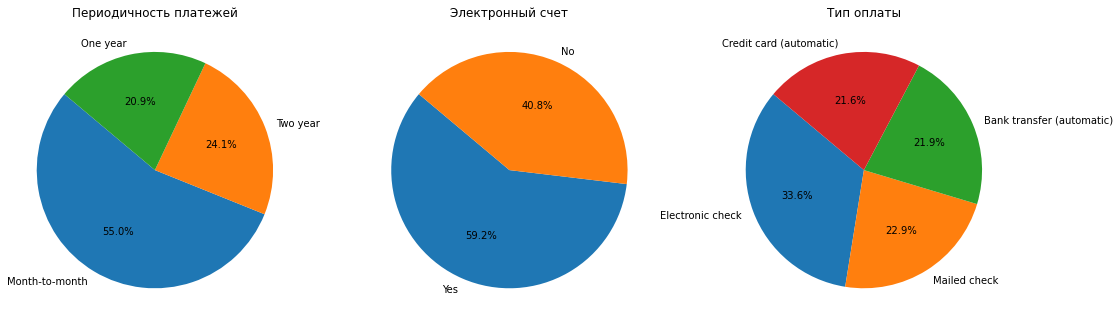

In [20]:
type_val = contract_new['type'].value_counts()
paperless_billing_val = contract_new['paperless_billing'].value_counts()
payment_method_val = contract_new['payment_method'].value_counts()

# Подготовка данных для пирогов
sizes1 = type_val
labels1 = type_val.index

sizes2 = paperless_billing_val
labels2 = paperless_billing_val.index

sizes3 = payment_method_val
labels3 = payment_method_val.index

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab10').colors)
axs[0].set_title('Периодичность платежей')


axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab10').colors)
axs[1].set_title('Электронный счет')


axs[2].pie(sizes3, labels=labels3, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab10').colors)
axs[2].set_title('Тип оплаты')


plt.show()

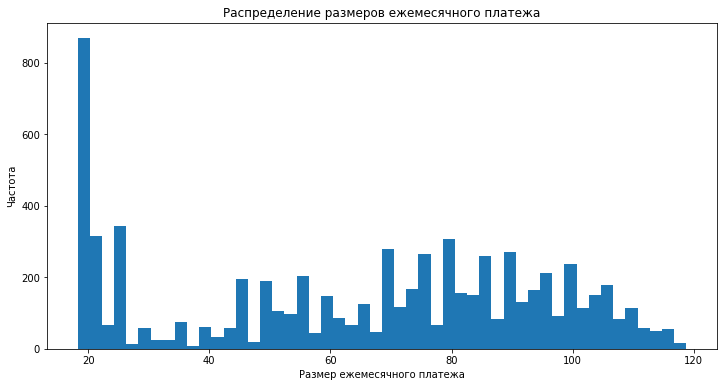

In [21]:
plt.figure(figsize=(12, 6))

plt.hist(contract_new['monthly_charges'], bins = 50)
plt.title('Распределение размеров ежемесячного платежа')
plt.xlabel('Размер ежемесячного платежа')
plt.ylabel('Частота')
plt.show()

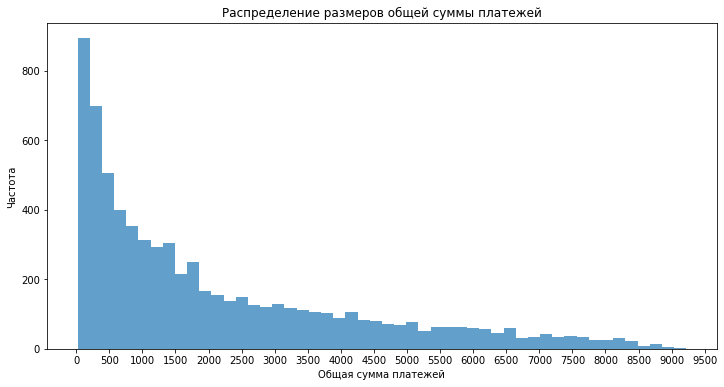

In [22]:
plt.figure(figsize=(12, 6))

plt.hist(contract_new['total_charges'], bins = 50, alpha = 0.7)
plt.title('Распределение размеров общей суммы платежей')
plt.xlabel('Общая сумма платежей')
plt.ylabel('Частота')
plt.xticks(range(0, 10000, 500))
plt.show()

Исследовательский анализ contract_new:

1. begin_date: 
        1.1. минимальное значение - 2013-10-01, максимальное - 2020-02-01. Отсюда напрашивается вывод, что при расчете срока жизни абонента, если контракт не разорван, именно 2020-02-01 можно использовать как текущую дату.
        1.2. Распределение достаточно равномерное, видно, что много клиентов в выборке, которые пришли в 2013-2014 годах, после чего распределение равномерное до начала роста в 2018-2019 и вплоть до 2020 года.
В итоговую таблицу данный столбец не войдет - туда будет включен расчетный признак: end_date-begin_date, т.е. длительность жизни абонента в компании.


2. end_date: 
        2.1. Минимальное значение - 2014-06-01, максимальное - 2020-01-01. 
        2.2. Распределение с уклоном вправо, общая тенденция ухода абонентов идет вверх. При этом, в определенные периоды можно наблюдать пиковые значения.
В итоговую таблицу данный столбец не войдет - туда будет включен расчетный признак: end_date-begin_date, т.е. длительность жизни абонента в компании.


3. type: категориальный признак, содержащий 3 значения:
        3.1. Month-to-month или ежемесячные платежи, составляют 55% от выборки;
        3.2. Two year - 1 платеж за 2 года, 24.1% от выборки;
        3.3. One year - 1 платеж в год, 20.9% от выборки.
Вполне вероятно, что абоненты из п. 3.2. и 3.3. по окончанию оплаченного периода могут уходить активнее. Этот признак войдет в итоговую таблицу.


4. paperless_billing - признак использования электронного счета, булевый. 59.2% абонентов используют его, а 40.8% абонентов видимо получают счета на бумаге. Не совсем очевидно, может ли быть эта информация полезна для модели, однако, вероятно, она может характеризовать пользователей - возможно, те абоненты, что предпочитают счета на бумаге более консервативны и реже меняют оператора. Включим данный столбец в итоговую таблицу.


5. payment_method - тип платежа, категориальный признак, в котором 4 основных значения:
	5.1. Electronic check - 33.6%
	5.2. Mailed check - 22.9%
	5.3. Bank transfer (automatic) - 21.9%
	5.4. Credit card (automatic) - 21.6%
Здесь как вариант можно немного по-другому разделить типы платежей - является ли он автоматическим или нет. Признак не кажется важным, но все же оставим его в итоговой таблице.


6. monthly_charges
        Mean	64.761692
        Minimum	18.25
        5-th percentile	19.65
        Q1	35.5
        median	70.35
        Q3	89.85
        95-th percentile 107.4
        Maximum	118.75
Здесь можно наблюдать достаточно широкий диапазон значений, но это не вызывает особенных вопросов, учитывая, что наборы услуг могут быть разнообразными. Также можно отметить, что выбросов практически нет. Данный столбец войдет в итоговую таблицу.


7. total_charges - общая сумма начислений, числовой признак со следующими особенностями:
        Mean	2118.6218
        median	1345.275
        5-th percentile	77.8085
        95-th percentile 6633.1565
        Minimum	19.05
        Maximum	9221.38
        Zeros	0
        Negative 0
В целом, видим здесь широкий диапазон значений, как и в monthly_charges, которые зависят от набора услуг абонента, а также, что очень важно - срока жизни абонента. Включение этого столбца в итоговую таблицу вызывает сомнения, т.к. прослеживается заметная корреляция с monthly_charges (~0.65), а также очевидно, что есть прямая корреляция со сроком жизни абонента. Поэтому, пока обойдемся без него.



**Итого, что выносим отсюда в итоговую таблицу:**
1) срок жизни абонента, в месяцах - customer_life\
2) признак окончания действия договора\
3) type\
4) paperless_billing\
5) payment_method\
6) monthly_charges

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>А с выводами - СУПЕР!!! 5 баллов. Всё отмечено, что есть важного, молодец.</p>
</div>

### Исследуем таблицу personal_new

In [23]:
personal_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


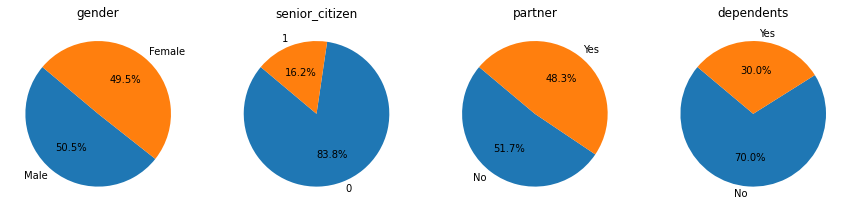

In [24]:
columns_to_plot = [col for col in personal_new.columns if col != 'customer_id']

fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

for ax, column in zip(axs, columns_to_plot):
    value_counts = personal_new[column].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(column)
    
plt.show()

Исследовательский анализ personal_new:

1. gender - практически равное распределение пола, мужчины 50.5%, женщины 49.5%.
2. senior_citizen - признак пенсионера, является положительным для 16.2% абонентов.
3. partner - признак наличия супруга/супруги, является положительным для 48.3% абонентов.
4. dependents - наличие детей, положительный для 30% абонентов.
5. Корреляция - в данном случае, есть прямая корреляция между наличием детей и наличием супруга/супруги, но выражена она не очень сильно (0.45).

Все признаки из этой таблицы могут быть полезны для модели, поэтому они попадут в итоговую таблицу.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>И тут с выводами - всё радует душу)) ок.
    </p>
</div>

### Исследуем таблицу internet_new

In [25]:
 internet_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


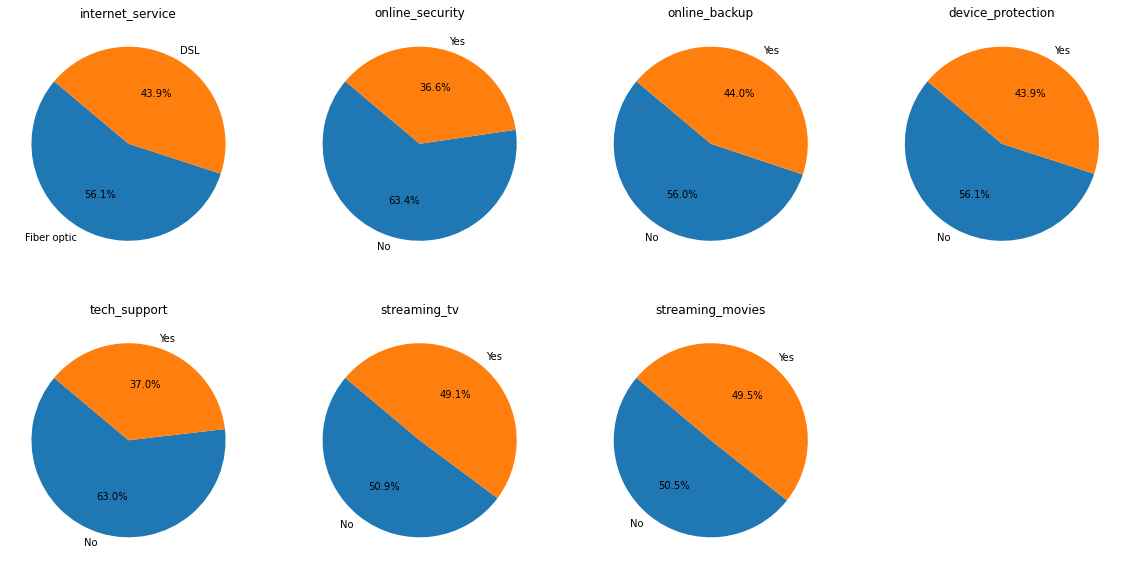

In [26]:
columns_to_plot = [col for col in internet_new.columns if col != 'customer_id']
n_cols = 4
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axs = axs.flatten()
for ax, column in zip(axs, columns_to_plot):
    value_counts = internet_new[column].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(column)
    
for ax in axs[len(columns_to_plot):]:
    ax.axis('off')    
    
plt.show()

Исследовательский анализ internet_new:

1. internet_service - тип подключения, категориальный признак с 2 значениями:
        1.1. Fiber optic - 56%
        1.2. DSL - 44%
Данный признак может быть показателен, т.к. от данного типа подключения напрямую зависит скорость интернета. Как вариант, у пользователей DSL может просто не быть возможности подключить оптоволокно из-за ограничений оператора.
2. online_security - признак положителен для 36.6% абонентов
3. online_backup - признак положителен для 44% абонентов
4. device_protection - признак положителен для 44% абонентов
5. tech_support - признак положителен для 37% абонентов
6. streaming_tv - признак положителен для 49% абонентов
7. streaming_movies - признак положителен для 49.5% абонентов

В целом, признаки доп. услуг достаточно разнообразны и популярны у абонентов, поэтому включим их все в общую таблицу и на следующем этапе проанализируем в разрезе ушел/не ушел.


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>👍</p>
</div>

### Исследуем таблицу phone_new

In [27]:
phone_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


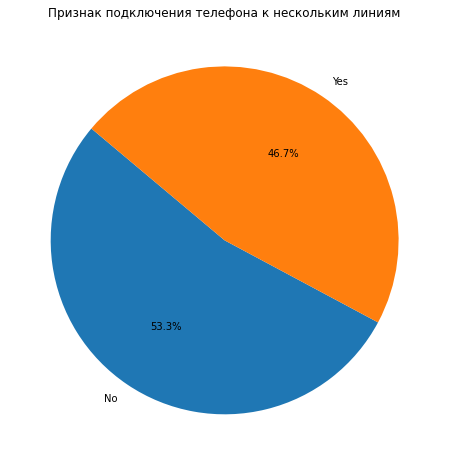

In [28]:
multiple_lines_vc = phone_new['multiple_lines'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(multiple_lines_vc, labels = multiple_lines_vc.index, autopct='%1.1f%%', startangle=140)
plt.title('Признак подключения телефона к нескольким линиям')
plt.show()

Здесь всего 1 признак подключения телефона к нескольким линиям, который положителен для 46.7% абонентов. Думаю, что его можно добавить в итоговую таблицу.

### Создание единой таблицы с данными

#### Объединяем все таблицы

In [35]:
total_data = pd.merge(contract_new, personal_new, on = 'customer_id', how = 'left')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 660.4+ KB


In [36]:
total_data = pd.merge(total_data, internet_new, on = 'customer_id', how = 'left')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

In [37]:
total_data = pd.merge(total_data, phone_new, on = 'customer_id', how = 'left')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Мержевание верно. Главное - не потерять ни одного клиента)</p>
</div>

#### Приводим в порядок признаки объединенной таблицы

Добавим признаки:

In [38]:
# Признак ухода абонента
total_data['is_leave'] = pd.notna(total_data['end_date'])

In [40]:
#Срок жизни абонента в месяцах
total_data['end_date'] = total_data['end_date'].fillna('2020-02-01')
total_data['customer_life_duration'] = (total_data['end_date'] - total_data['begin_date']).dt.days / 30

#Удаляем лишние столбцы
total_data = total_data.drop(columns = ['begin_date', 'end_date'])


total_data.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,is_leave,customer_life_duration
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,False,1.033333
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,False,34.533333
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,False,4.100000
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,False,45.700000
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,False,5.100000


In [41]:
total_data['customer_life_duration'].describe()

count    7043.000000
mean       29.951858
std        22.771017
min         0.000000
25%         9.200000
50%        25.366667
75%        48.700000
max        77.133333
Name: customer_life_duration, dtype: float64

In [42]:
display(total_data[total_data['customer_life_duration'] == 0])

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,is_leave,customer_life_duration
488,4472-LVYGI,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN,False,0.0
753,3115-CZMZD,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,False,0.0
936,5709-LVOEQ,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,False,0.0
1082,4367-NUYAO,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,False,0.0
1340,1371-DWPAZ,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,False,0.0
3331,7644-OMVMY,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,False,0.0
3826,3213-VVOLG,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,False,0.0
4380,2520-SGTTA,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,False,0.0
5218,2923-ARZLG,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,False,0.0
6670,4075-WKNIU,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,False,0.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>новый признак - супер. Принято. При этом - календарное время удаляем. ОК.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>единственное - проверить бы, что длительность контракта для всех считаетс верно. Для тех, кто ушёл - там конечная дата минус начальна. А для тех кто остался - дата выгрузки базы минус начальная. У нас сейчас так? Проверь, пожалуйста.</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Все так, я не стал менять отсутствующие даты на дату выгрузки, немного захардкодил расчет вот так:
    
```python
    total_data['customer_life_duration'] = (pd.Timestamp('2020-02-01') - total_data['begin_date']).dt.days / 30
```

В результате есть 11 клиентов с длительностью 0 - но это нормально, т.к. эти абоненты заключили контракт 2020-02-01, как раз в день выгрузки.    

</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>C этим понял. Но вот есть иной момент. Вот ввёл новую переменную в расчёт 'customer_life_duration_1'( можно удалить потом).  Она вычислляет длительность контракта у тех, кто ушёл. И вычисляет верно - можно это проверить, выведя начальную и конечную дату и в ручную посчитать. У тебя она считает в начале 'customer_life_duration'. Но потом перевычисляется второй строкой у тебя. И в итоге не верно выхрдит(( посмотри, пожалуйста. Надо сначала заполнить пропуски в датах датой выгрузки. А потом уже один раз взять разницу. Посмотри ещё раз, пожалуйста.</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

Наконец-то дошло, в чем проблема, в голове была схема, что нужно применить это 
```python
    total_data['customer_life_duration'] = (pd.Timestamp('2020-02-01') - total_data['begin_date']).dt.days / 30
```
только к пропущенным значениям end_date, а применил в итоге везде. Поправляю

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 3</b><br>👍👍

In [47]:
total_data['is_leave'].describe()

count      7043
unique        2
top       False
freq       5942
Name: is_leave, dtype: object

Получена итоговая таблица для дальнейшего анализа. Остался последний штрих - заполнение пропущенных значений и можно переходить к следующему этапу. В данном случае, пропущенные значения заменю на '-1', т.к. заполнять их больше нечем, практически все пропущенные значения являются категориальными или булевыми признаками и во избежание путаницы, так можно обозначить отсутствие подключения основной услуги.

И заменим yes и no на 1 и 0:

In [48]:
total_data.replace({'Yes': 1, 'No': 0}, inplace = True)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ок</p>
</div>

In [49]:
total_data.fillna(-1, inplace = True)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>-1 - нет подключенной услуги, хорошо.</p>
</div>

customer_id сделаем индексом, т.к. для модели он не нужен и в случае чего можно будет восстановить id

In [50]:
total_data = total_data.set_index('customer_id')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    7043 non-null   object 
 1   paperless_billing       7043 non-null   int64  
 2   payment_method          7043 non-null   object 
 3   monthly_charges         7043 non-null   float64
 4   total_charges           7043 non-null   float64
 5   gender                  7043 non-null   object 
 6   senior_citizen          7043 non-null   int64  
 7   partner                 7043 non-null   int64  
 8   dependents              7043 non-null   int64  
 9   internet_service        7043 non-null   object 
 10  online_security         7043 non-null   float64
 11  online_backup           7043 non-null   float64
 12  device_protection       7043 non-null   float64
 13  tech_support            7043 non-null   float64
 14  streaming_tv            7043 n

## Исследовательский анализ итоговой таблицы и формирование выборок для обучения моделей

### Портрет ушедших абонентов

Побробуем взглянуть на параметры абонентов в зависимости ушел/остался:

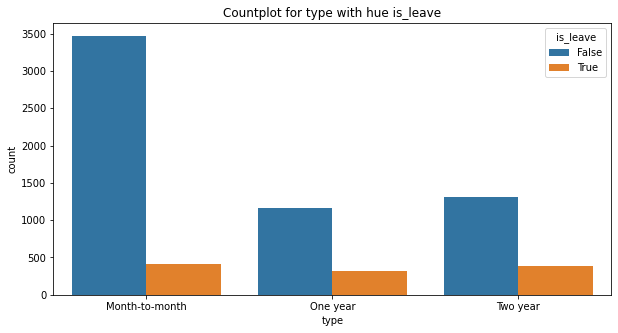

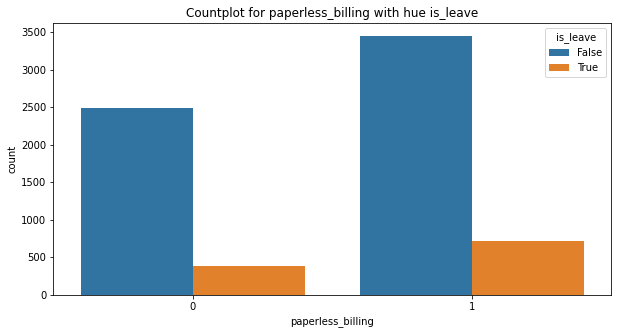

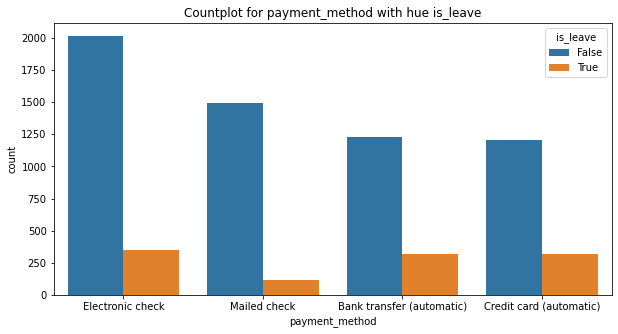

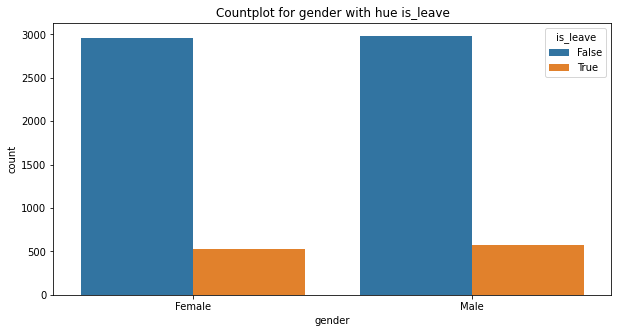

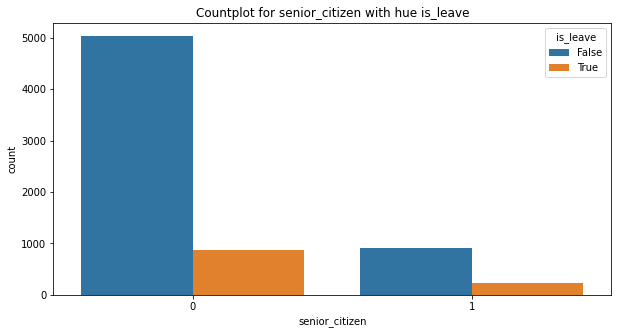

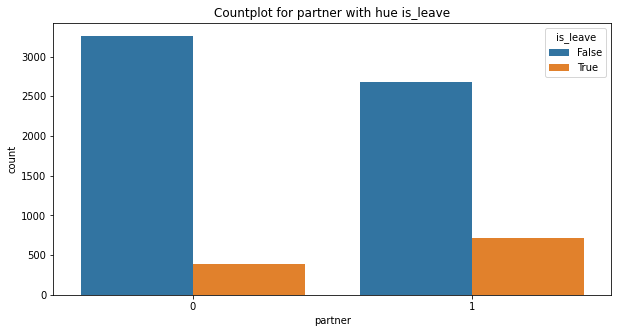

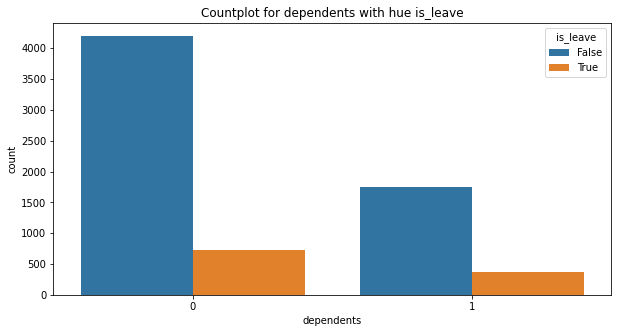

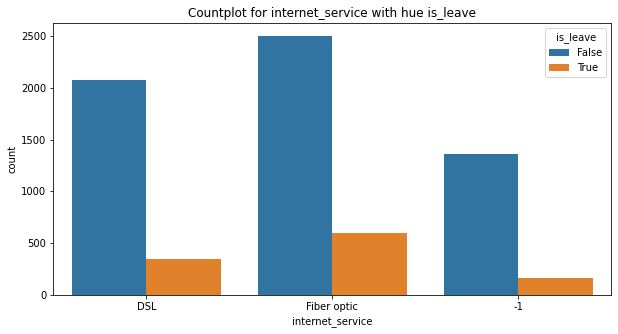

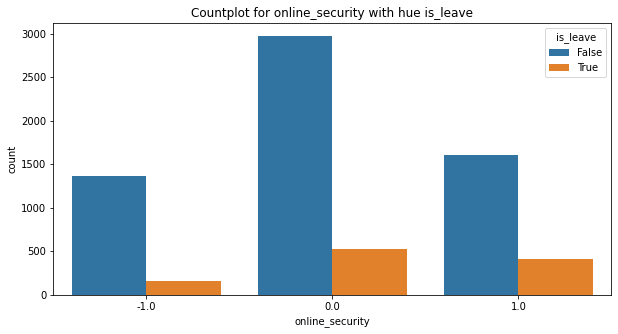

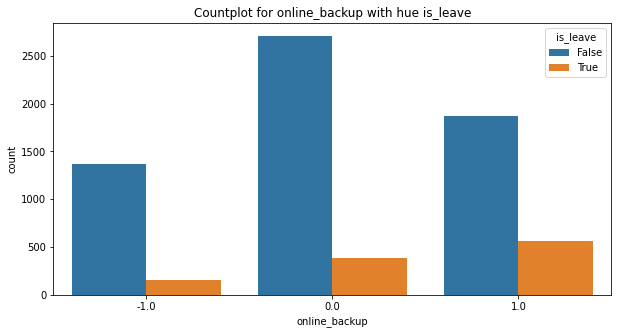

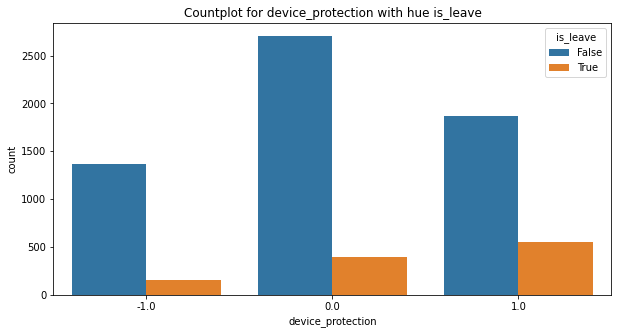

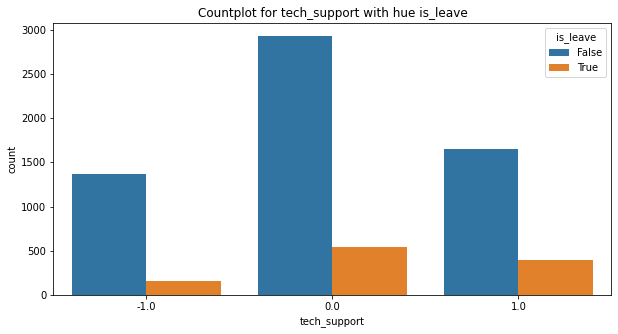

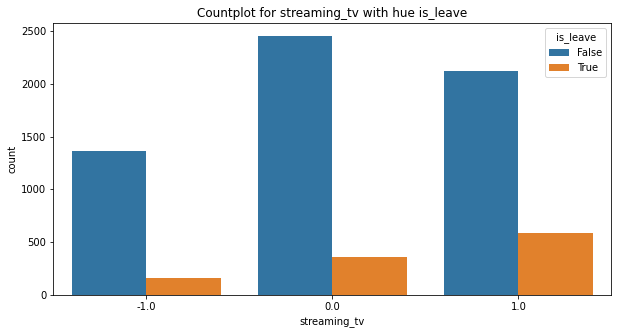

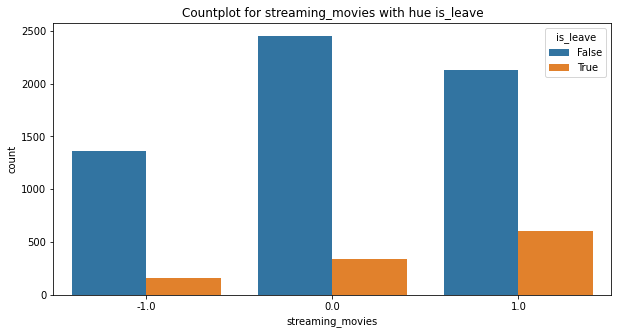

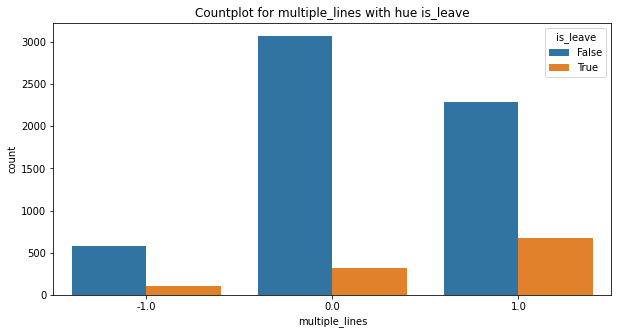

In [51]:
category_columns = ['type', 'paperless_billing', 'payment_method',
       'gender', 'senior_citizen', 'partner', 'dependents',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines']
hue_column = 'is_leave'

for col in category_columns:
    if col != hue_column:
        plt.figure(figsize=(10, 5))
        sns.countplot(x = col, hue = hue_column, data = total_data)
        plt.title(f'Countplot for {col} with hue {hue_column}')
        plt.show()

Отдельно глянем на числовые признаки:

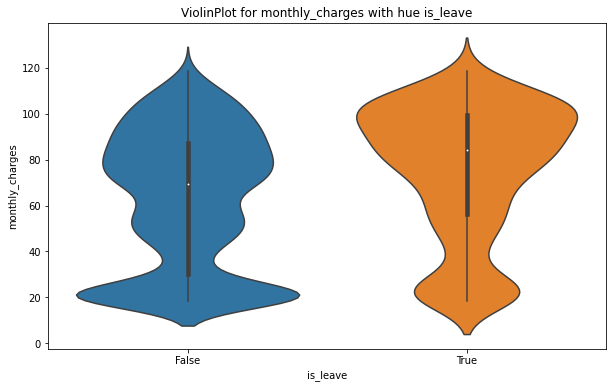

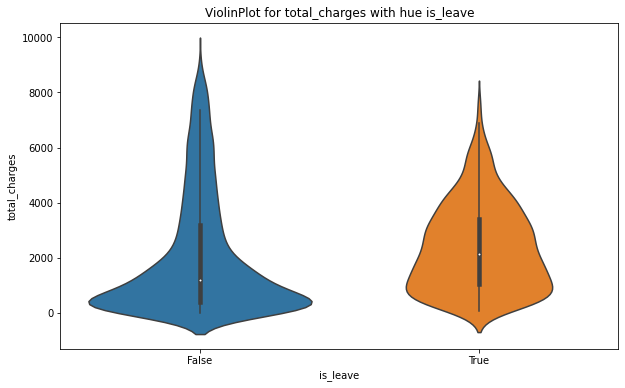

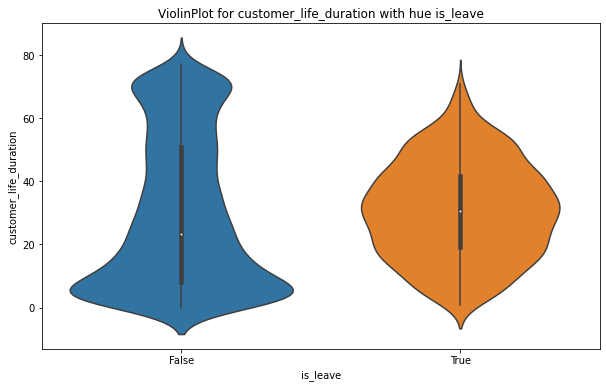

In [52]:
numeric_columns = ['monthly_charges', 'total_charges', 'customer_life_duration']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x = hue_column, y = col, data = total_data)
    plt.title(f'ViolinPlot for {col} with hue {hue_column}')
    plt.show()

Вывод:

    1) Периодичность оплаты (type) - ушедшие абоненты практически равномерно распределены между типами оплаты. При этом, среди оставшихся абонентов заметный перекос в сторону помесячной оплаты.
    2) Получение электронного счета (paperless_billing) - здесь ничего примечательного, обе группы предпочитают электронный счет.
    3) Тип платежа (payment_method) - в отличие от оставшихся абонентов, ушедшие намного реже пользовались бумажными чеками для оплаты.
    4) Пол (gender) - у обеих групп одинаковое распределение.
    5) Признак пенсионера (senior_citizen) - у обеих групп примерно одинаковые доли пенсионеров.
    6) Признак наличия супруги/супруга (partner) - можно отметить, что в группе ушедших абонентов больше семейных.
    7) Признак наличия детей (dependents) - здесь примерно одинаковое распределение у обеих групп абонентов.
    8) Тип интернет-соединения (internet_service) - примечательно, что среди ушедших абонентов подгруппа не использующих интернет относительно меньше, чем в группе активных абонентов.
    9) Доп услуги интернет-пользователей (online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies) - попробую рассмотреть их все одним пунктом, в целом, относительно группы активных абонентов, ушедшие абоненты немного больше пользовались доп. услугами.
    10) Сумма ежемесячных платежей (monthly_charges) - у ушедших абонентов явно прослеживается перевес в сторону более высоких платежей - что можно объяснить использованием доп. услуг.
    11) Общая сумма платежей (total_charges) - здесь также прослеживается распределение в сторону более высоких значений у ушедших абонентов по сравнению с активными.
    12) Продолжительность активности абонента (customer_life_duration) - достаточно явно выделяется распределение в сторону высоких значений у ушедших абонентов - чаще уходят "долгожители". Вероятно, это может быть связано с привлекательными условиями у других операторов и отсутствие спец. предложений у текущего. Возможно, это один из самых главных признаков - плохо работает процесс удержания, либо на долгожителями нужно заниматься в первую очередь.
    
    
Можем подвести итог и набросать примерный портрет уходящих:
- Это "доложители", является клиентами более 2-х лет;
- Больше пользуются доп услугами, больше платят, при этом часто платят за длительный период единоразово;
- Предпочитают электронные платежи
- Немного чаще являются женатыми/замужними (здесь видимо играет то, что принимают решение 2 взрослых человека со своим мнением)


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
Всё здорово!!! Замечу только, что графический анализ - это предположение/гипотеза о влиянии факторв на целевую.  И чтобы подтвердить/опровергнуть его - применяют аналитические методы проверки гипотез (спринт 4, например).

### Взглянем на зависимости:

In [53]:
interval_col =  ['paperless_billing', 'monthly_charges', 'senior_citizen', 'partner', 
                 'dependents', 'online_security', 'online_backup', 'device_protection', 
                 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines', 'customer_life_duration']

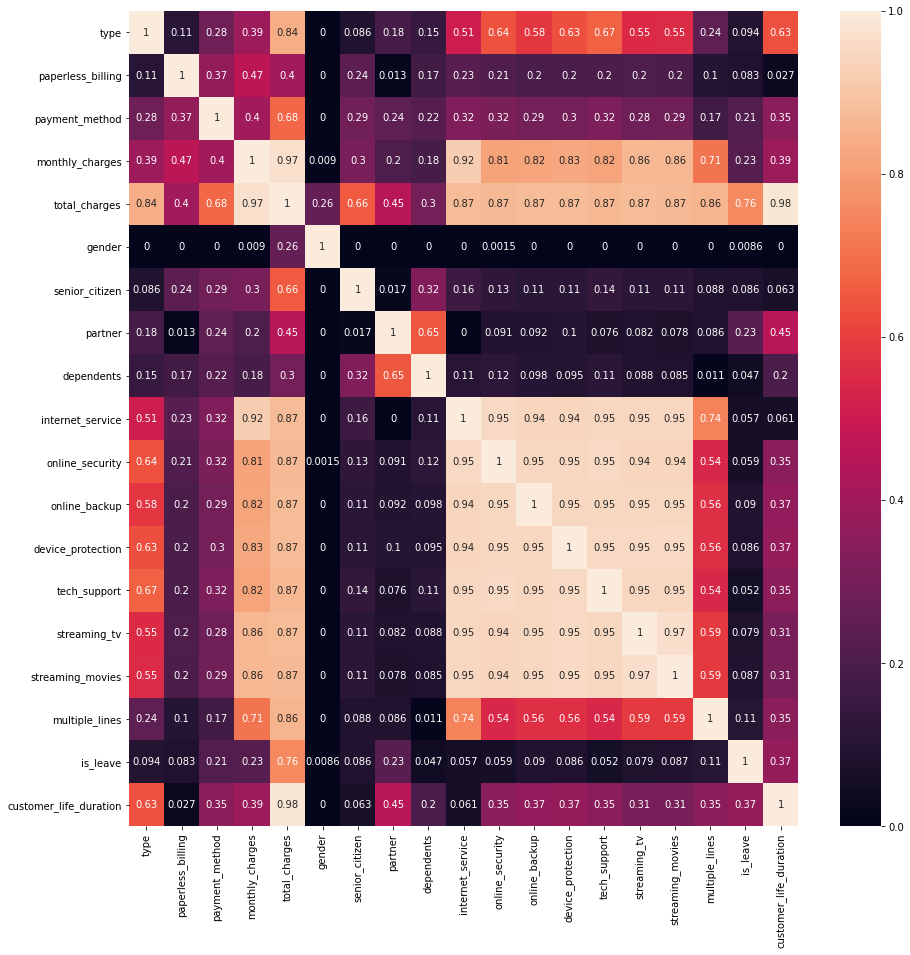

In [54]:
phik_matrix = total_data.phik_matrix(interval_cols = interval_col)
plt.figure(figsize=(15, 15))
sns.heatmap(phik_matrix, annot=True)
plt.show()

Судя по картинке, у нас присутствует явная мультиколлинеарность между длительностью договора и длительностью жизни абонента.

Что делать - думаю, что нужно почистить признаки, во избежание переобучения модели:\
        - из блока интернет оставляем только internet_service\

Думаю, что остальное можно оставить.
Я пробовал предварительно обучить модель на полном наборе данных, кроме очевидно лишних признаков с датами, с учетом OHE, масштабирования и апсэмплинга получал явные признаки переобучения, когда на обучающей выборке метрика под 100%, а на тесте крутится около 75%. Причем пробовал различные вариации предобработки данных, результат +/- одинаковый.

UPD - удаление total_charges или monthly_charges негативно сказывалось на моделях, поэтому эти признаки оставляю.

**UPD - есть выраженная мультиколлеарность между длительностью договора и длительностью жизни абонента.**

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Когда говорим о явлении мультиколлинеарности, то это справедливо только к количественным шкалам. В нашей задаче - тоьлко финансы и длительность договора.</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Поправил вывод 

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 2</b><br>ОК

## Работа с моделями

Наблюдения из предыдущих попыток:
1) Апсамлп, даунсампл - не работает, модель показывает худший результат, при явном дисбалансе классов\
2) Слишком много признаков - плохо, модель с полным набором признаков работает плохо, а также не стоит удалять количественные признаки (total_cahrges или monthly_charges) - с ними модель показала себя намного лучше.

В данном варианте удалены все попытки и лишний код, остается только то, что в итоге идет в финальный зачет.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Хорошо, понял. Спасибо, что описал суть проделаннной работы за кадром.</p>
</div>

In [55]:
state = RandomState(20824)

In [56]:
features = total_data.drop(['is_leave', 'online_security', 'online_backup', 'device_protection', 
                 'tech_support', 'streaming_tv', 'streaming_movies'], axis = 1)
target = total_data['is_leave']

In [57]:
features_train, features_test, target_train, target_test = train_test_split(features, target, stratify = target,
                                                                            test_size = 0.25, random_state = state)
display(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(5282, 12)

(1761, 12)

(5282,)

(1761,)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>и стратификация в деле - принято.</p>
</div>

In [58]:
display(features_train.head(),target_train.head())

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,multiple_lines,customer_life_duration
customer_id,,,,,,,,,,,,
2192-OZITF,Two year,0,Mailed check,73.55,3309.75,Female,0,0,0,DSL,1.0,45.700000
6376-GAHQE,Month-to-month,0,Electronic check,77.85,555.85,Male,0,0,0,Fiber optic,0.0,7.166667
7989-CHGTL,Month-to-month,1,Mailed check,19.60,100.94,Male,0,0,0,-1,0.0,5.100000
5385-SUIRI,Month-to-month,1,Electronic check,104.20,2817.57,Male,1,1,0,Fiber optic,1.0,26.400000
9638-JIQYA,Month-to-month,1,Credit card (automatic),24.90,49.80,Male,0,0,0,DSL,-1.0,2.066667


customer_id
2192-OZITF    False
6376-GAHQE    False
7989-CHGTL    False
5385-SUIRI     True
9638-JIQYA    False
Name: is_leave, dtype: bool

In [59]:
numeric = ['customer_life_duration', 'monthly_charges', 'total_charges']
categorial = ['type', 'payment_method', 'gender', 
              'senior_citizen', 'partner', 'dependents','internet_service','multiple_lines']

In [60]:
target_train.value_counts()

is_leave
False    4456
True      826
Name: count, dtype: int64

В целом понятно, что есть дисбаланс классов, но балансировка ухудшает результат.

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop = 'first'), ['type', 'payment_method', 'gender', 'paperless_billing',
              'senior_citizen', 'partner', 'dependents','internet_service','multiple_lines']),
        ('num', StandardScaler(), ['customer_life_duration', 'monthly_charges', 'total_charges'])
    ],
    remainder='passthrough'
)

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>На мой взгляд - OHE-категоризацю тут лучше подходит (как и в большинстве случаев). Порядковая категоризация как-то мутновато работает))</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

На самом деле пробовал OHE, правда в той попытке все признаки были на борту и модель показала себя плохо. 
Попробую в данной конфигурации его применить
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 2</b><br>понял, хорошо.

In [62]:
#Чтобы OHE сработал корректно, приведем данные в столбцах (internet_srvice) к однородному типу
features_train['internet_service'] = features_train['internet_service'].replace(-1, 'empty')
features_test['internet_service'] = features_test['internet_service'].replace(-1, 'empty')

### Обучение моделей

In [63]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [64]:
%%time
forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = state))])

parametrs_forest = {'classifier__max_depth': [5, 10, 15, 20],
                 'classifier__n_estimators': [30, 50, 80, 100],
                  'classifier__min_samples_split': [2, 5, 10]}

forest_grid = GridSearchCV(forest, parametrs_forest, cv=5, scoring = 'roc_auc')
forest_grid.fit(features_train, target_train)

forest_best = forest_grid.best_estimator_

print('Random_Forest Лучшие параметры:', forest_grid.best_params_)
print('Random_Forest Лучший RocAuc:', forest_grid.best_score_)

Random_Forest Лучшие параметры: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Random_Forest Лучший RocAuc: 0.8347541925438564
CPU times: user 1min 14s, sys: 239 ms, total: 1min 14s
Wall time: 1min 15s


In [65]:
proba_forest = forest_best.predict_proba(features_test)
forest_test_auc = roc_auc_score(target_test, proba_forest[:, 1])
print('ROC-AUC: ', forest_test_auc)

ROC-AUC:  0.81142175455769


In [66]:
%%time
cat = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  CatBoostClassifier())
])

parametrs_cat = [{'classifier__learning_rate': [0.05, 0.1, 0.3, 0.5],
                  'classifier__iterations': [300, 500, 700, 1000],
                  'classifier__l2_leaf_reg': [1, 3, 5],
                  'classifier__early_stopping_rounds': [20],
                  'classifier__verbose': [False],
                  'classifier__random_seed': [20824]}]

cat_grid = GridSearchCV(cat, parametrs_cat, cv=5, scoring = 'roc_auc')
cat_grid.fit(features_train, target_train)

cat_best = cat_grid.best_estimator_

print('Random_Forest Лучшие параметры:', cat_grid.best_params_)
print('Random_Forest Лучший RocAuc:', cat_grid.best_score_)

Random_Forest Лучшие параметры: {'classifier__early_stopping_rounds': 20, 'classifier__iterations': 1000, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.1, 'classifier__random_seed': 20824, 'classifier__verbose': False}
Random_Forest Лучший RocAuc: 0.920138039933242
CPU times: user 5min 38s, sys: 17.4 s, total: 5min 55s
Wall time: 8min 41s


In [67]:
proba_cat = cat_best.predict_proba(features_test)
cat_test_auc = roc_auc_score(target_test, proba_cat[:, 1])
print('ROC-AUC: ', cat_test_auc)

ROC-AUC:  0.9071271259023617


In [68]:
%%time
lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  LGBMClassifier())
])

parametrs_lgbm = [{'classifier__num_leaves': [100, 300, 500], 
                   'classifier__learning_rate': [0.3, 0.5, 0.7], 
                   'classifier__reg_lambda': [0, 1, 5],
                   'classifier__random_state': [state]}]

lgbm_grid = GridSearchCV(lgbm, parametrs_lgbm, cv=5, scoring = 'roc_auc')
lgbm_grid.fit(features_train, target_train)

lgbm_best = lgbm_grid.best_estimator_

print('LGBM Лучшие параметры:', lgbm_grid.best_params_)
print('LGBM Лучший RocAuc:', lgbm_grid.best_score_)

LGBM Лучшие параметры: {'classifier__learning_rate': 0.5, 'classifier__num_leaves': 100, 'classifier__random_state': RandomState(MT19937) at 0x7FE94C1EE340, 'classifier__reg_lambda': 5}
LGBM Лучший RocAuc: 0.8773362971377205
CPU times: user 15min 4s, sys: 7.04 s, total: 15min 11s
Wall time: 15min 21s


In [69]:
proba_lgbm = lgbm_best.predict_proba(features_test)
lgbm_test_auc = roc_auc_score(target_test, proba_lgbm[:, 1])
print('ROC-AUC: ', lgbm_test_auc)

ROC-AUC:  0.8872568212406705


### Итог тестирование моделей:

Т.к. можели недалеко друг от друга по качеству, подведем итог по всем:

In [70]:
results = pd.DataFrame({'Лучший RocAuc на обучающей выборке': [forest_grid.best_score_, cat_grid.best_score_, lgbm_grid.best_score_],
                        'RocAuc на тестовой выборке': [forest_test_auc, cat_test_auc, lgbm_test_auc]},
                      index = ['RandomForest', 'CatBoost', 'LightGBM'])

In [71]:
display(results)

,Лучший RocAuc на обучающей выборке,RocAuc на тестовой выборке
RandomForest,0.834754,0.811422
CatBoost,0.920138,0.907127
LightGBM,0.877336,0.887257


Итого, с небольшим отрывом лучшей моделью оказался CatBoostClassifier. Посмотрим на важность признаков:

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>итогова табличка - это по-грамотному) ОК.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Только результы какие-то супер-позитивные) Возможно, что это завязанона расчёт длительности контракта - выше написал о этом)</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

С длительностью порядок. Я получил качественный скачек модели, когда убрал признаки доп. услуг - я так понимаю, что они сильно шумели и мешали модели произвести нормальный расчет.
    
После применения ONE-HOT ENCODER результаты стали немного лучше
    
</div>

#### Анализ признаков лучшей модели

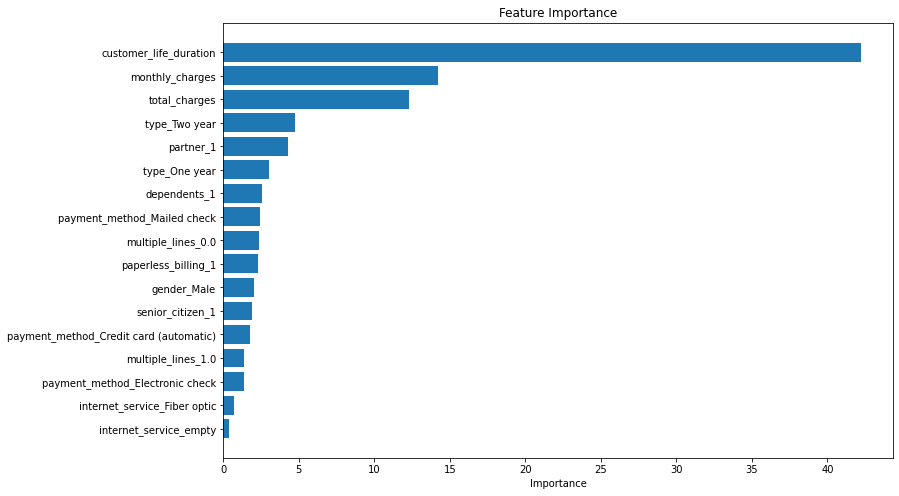

In [72]:
cat_features = cat_best.named_steps['classifier']
feature_importances = cat_features.get_feature_importance()

cat_feature_names = cat_best.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()
num_feature_names = ['customer_life_duration', 'monthly_charges', 'total_charges']

all_feature_names = list(cat_feature_names) + num_feature_names

importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


Вывод: Наиболее значимые призаки - общая сумма платежей, ежемесячная сумма платежа и срок жизни абонента. В целом, это ожидаемо исходя их аналиа параметров в п. 3.1.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта"). И этот баллст можно исключить и перестроить модель. Метрика не должна силно измениться. 

In [73]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(features_train, target_train)
dummy_proba = dummy.predict_proba(features_test)
dummy_roc_auc = roc_auc_score(target_test, dummy_proba[:, 1])

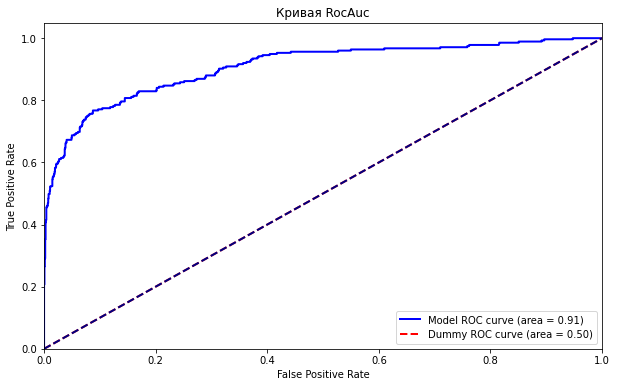

In [74]:
fpr_model, tpr_model, _ = roc_curve(target_test, proba_cat[:, 1])
fpr_dummy, tpr_dummy, _ = roc_curve(target_test, dummy_proba[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_model, tpr_model, color='blue', lw=2, label=f'Model ROC curve (area = {cat_test_auc:.2f})')
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, linestyle='--', label=f'Dummy ROC curve (area = {dummy_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривая RocAuc')
plt.legend(loc="lower right")
plt.show()

Кривая практически идеальна, что ожидаемо, учитывая высокий показатель roc_auc

А также воспользуемся средством SHAP:

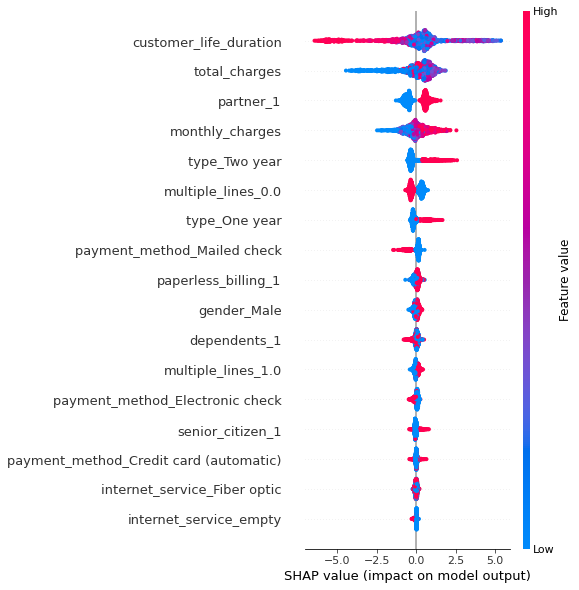

In [75]:
features_test_transformed = cat_best.named_steps['preprocessor'].transform(features_test)
explainer = shap.Explainer(cat_best.named_steps['classifier'])
shap_values = explainer.shap_values(features_test_transformed)
shap.summary_plot(shap_values, features_test_transformed, feature_names = all_feature_names)

Что можно сказать здесь:

    1) customer_life_duration - признак, оказывающий влияние на оба класса, чем он выше - тем ближе предсказание к True и наоборот.
    2) total_carges - аналогично предыдущему, но наоборот - чем ниже показатель, тем ближе предсказание к True и наоборот.
    3) monthly_charges - еще один признак, оказывающий значительное влияние на предсказание. Чем выше его значение, тем ближе предсказание к положительному и наоборот.

На взгляд кажется, что эти 3 основных признака имеют примерно одинаковое влияение на оба класса предсказаний. 

#### Precision, Recall, Confusion matrix

In [76]:
predictions = cat_best.predict(features_test)
predictions = [label == 'True' for label in predictions]

In [77]:
precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.87
Recall: 0.55


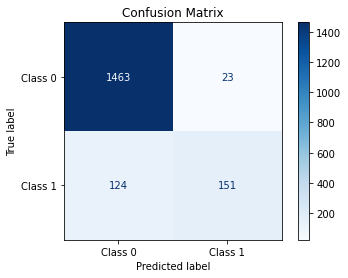

In [78]:
conf_matrix = confusion_matrix(target_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Class 0', 'Class 1'])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Что можем сказать здесь:
1) Модель очень хорошо предсказывает класс 0, практчиески без ошибок. В целом, показывая высокую точность в 99%.
2) Но, класс 1 предсказывается уже не очень хорошо - модель предсказала только 81% истинно-положительных из всех положительных вариантов.

Итого, модель классно умеет предсказывать 0, но с 1 начинаются проблемы. Возможно, этот показатель можно подтянуть, перебирая модели и гиперпараметы. Однако, в нашем случае класс 1 намного более редкий, чем 0 - можно побровать синтетически покрутить выборки, но далеко не факт, что это поможет увеличить показатель (Recall)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>супер! На мой взгляд, именно эти метрики наиболее важны в классификацилнных моделях!!! 

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Соглашусь, в данном конкретном случае с точки зрения бизнеса было предпочтительнее, если бы модель ложнопредсказывала чуть больше 1, нежели 0. Лучше поработать с немного большим количеством абонентов, которые не собирались уходить, чем упустить из виду почти 20% абонентов, которые, вероятно, подумывают об уходе)
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 2</b><br>воооот, эти размышления и есть то, что надо)

## Итоги проекта

Отчет по проекту.
     
    1. Выполнен импорт бибилиотек и данных, проведено первичное ознакомление с данными. Подробные комментарии можно увидеть в разделе 1, здесь приведу ключевые моменты:
        1.1. Загружены 4 датафрейма с общим ключом - customer_id, по которому далее будет произведено соединение таблиц. 
        1.2. Произведена проверка каждого датафрейма на дубликаты и пропуски.
    2. Выполнен исследовательский анализ и предобработка данных, привожу основной итог:
        2.1. Исследовано каждое поле датафреймов (подробные выводы в разделе 2).
        2.2. Собрана итоговая таблица на 7043 по методу left join, основной таблицей выступал contract_new.
        2.3. В основной таблице обработаны пропуски, создан новый признак - длительность жизни абонента, на основе столбцов begin_date и end_date. В последствии, эти столбцы удалены, т.к. не имеют ценности для модели.
    3. Произведен исследовательский анализ итоговой таблицы:
        3.1. Сформирован типаж уходящего абонента: Это "доложители", является клиентами более 2-х лет; Больше пользуются доп услугами, больше платят, при этом часто платят за длительный период единоразово; Предпочитают электронные платежи Немного чаще являются женатыми/замужними (здесь видимо играет то, что принимают решение 2 взрослых человека со своим мнением)
        3.2. Удалены лишние признаки (доп. услуги), произведена предобработка таблицы перед обучением модели.
    4. Работа с моделями. 
        4.1. Обучены 3 модели классификации - RandomForest, CatBoost и LightGBM. Обучение произведено с применением пайплана для подготовки данных к обучению (encoder, scaler) а также с использованием GridSearchCV для перебора гиперпараметров и кросс-валидации. По итогам обучения выбрана лучшая модель - CatBoost.
        4.2. Параметры лучшей модели Catboost: 
            early_stopping_rounds: 20, 
            iterations: 700, 
            l2_leaf_reg: 3, 
            learning_rate: 0.3, 
            random_seed: 20824, 
            verbose: False
        4.3. Результаты лучшей модели на тестовых данных:
            RocAuc ~ 96%
            Precision - 99%
            Recall - 81%

Цель проекта выполнена, найдена лучшая модель по метрике RocAuc. Целевой - 85%, факт - 96%.

Но, модель не очень хорошо предсказывает класс 1 - возможно, ситуацию можно улучшить подбором другой модели и/или гиперпараметров.


Рекомендация заказчику. Учитывая главные факторы, влияющие на уход абонентов, я бы порекомендовал:
1) Обратить внимание на сегмент абонентов, со сроком жизни более 2-х лет - необходимы мероприятия по росту лояльности. На самом деле этот пункт очень важный и за одним этим предложением кроется большой объем работы. Возможно, в компании в принципе нет системы лояльности и старые абоненты просто уходят к другим операторам, предлагающим лучшие условия.

2) Проанализировать иные данные, например, обращения в поддержку, жалобы, звонки оператору и т.п., в контексте нашей задачи очень важно понимать историю взаимодействия с абонентом.


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Имран, скажу, что уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
А что совсем хорошо, так это то, что не стал гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки, многие их вставляют...)<br>


Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования:<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

<font color='red'>
А по проекту - вот только то, что написал. Посмотри, пожалуйта. Там данные не грузятся и из ввважного - проверить расчёёт длительности контракта..<br>
<font color='green'>    
Спасибо) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Большое спасибо за ревью и советы. 
    
В целом, как таковых вопросов у меня нет, но буду рад любым рекомендациям профильных материалов.
    
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>Спасибо, Имран, за отклик. Всё увидел по изменениям, ОК. Осталось ещё раз глянуть расчёт вычисления длительности договора. Постарался детельнее расписать проблематику. Посмотри, пожалуйста. БУДУ ЖДАТЬ!</p>
</div>

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

С длительностью конечно фиаско получилось, забавно, что ошибка была в таком простом вопросе) Ну и финальная метрика стала несколько скромнее

</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 3</b></u></p>
ОК, Имран, теперь точно можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br>Увидел твои комментари/коорректировки. А всегда так - где-то мекая описка случается, а потом сказывается на общем выводе)<br>
Вот, что ещё хотел написать важное:<br>
Порядок моделирования такой: на трайне ищем лучшую модель. Т.е. прям до такого момента: вот такая-то модель лучшая - выбираем её. А далее ТОЛЬКО её тестим на тестовой выборке. Т.е. проверяем свой вывод. Не нужно все модели тестить, смысл исследования тогда пропадает. Чтож, тогда всё на этом.<br>
 
На правах ментора добавлю вот что ещё: каждого из нас (и меня в том числе) можно оценивать с нескольких сторон, как специалиста.<br>
1) Умение анализировать, "вгрызание" в данные, в задачу.<br>
2) Знание мат.части: методы, подходы к решению - всё, что по программе заложено<br>
3) Кодовая часть: умение писать эффективный код.<br>
4) Работа с графикой. (умение хорошо ыизуализировать)<br>
И при рабочей деятельности (устраивание на работу/ улучшение карьеры) нам важно понимать свои слабые/сильные стороны по этим направлениям. И опираться на них при ведении переговоров и выстраивании дальнейшего совершенствования. <br>
Желаю тебе и дальше развиваться, находя свой путь в аналитической карьере.<br><br>    
      
Спасибо за этот труд!<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br> 